In [2]:
from __future__ import division
import numpy as np
import os
import sys
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

verbose = False

path = os.path.dirname(os.path.realpath("res.txt"))
inputFiles = os.path.join(path, "confagg")

if verbose: print(inputFiles)

dirs = []
data = {}

for o in os.listdir(inputFiles):
    if os.path.isdir(os.path.join(inputFiles, o)):
        dirs.append(os.path.join(inputFiles, o))

if verbose: print(os.listdir(inputFiles))

for dir in dirs:
    accs = []
    
    confusion_final = {}
    confusions = []    
    for file in os.listdir(dir):
        collect = False
        count = 0
        error = 0



        if file.endswith(".txt"):
            confusion = {}
            for line in reversed(open(os.path.join(dir, file)).readlines()):
                linesplit = line.rstrip().split(" ")
                if linesplit[0] == "over":
                    collect = True
                    continue
                if collect == True:
                    count = count + 1
                    if (linesplit[1], linesplit[2]) in confusion:
                        confusion[(linesplit[1], linesplit[2])] = confusion[(linesplit[1], linesplit[2])] + 1
                    else:
                        confusion[(linesplit[1], linesplit[2])] = 1
                    if linesplit[1] != linesplit[2]:
                        error = error + 1
                    if linesplit[0] == "0":
                        collect = False

        acc = float((count-error)/count)
        accs.append(acc)
        confusions.append(confusion)

    acc_mean = np.mean(accs)
    confusion_index_selected = 0
    distance = 1
    
    
    count = 0
    for i in accs:
        if i > acc_mean and i - acc_mean < distance:
            distance = i - acc_mean
            confusion_index_selected = count
        count = count + 1
        
    print("conf_index: " + str(confusion_index_selected))
    confusion = confusions[confusion_index_selected]

    if len(accs) != 0:
        data[dir.split("/")[len(dir.split("/"))-1]] = accs
        if verbose: print(dir + ":\t\t" + str(np.mean(accs)))

    maxlabel = 0
    for i in confusion:
        if int(i[0]) > maxlabel:
            maxlabel = int(i[0])
        if int(i[1]) > maxlabel:
            maxlabel = int(i[1])

    confusion_matrix = np.zeros((maxlabel + 1, maxlabel + 1), dtype=np.int)

    for i in confusion:
        confusion_matrix[int(i[0])][int(i[1])] = confusion[i]

    print(confusion_matrix)
    
    problem_classes = []
    
    f_scores = []
    f_score_min = 1
    for i in range(np.shape(confusion_matrix)[0]):
        true = confusion_matrix[i,:]
        tmp = np.delete(confusion_matrix, i,0)
        neg = np.sum(tmp, axis=0)
        tp = true[i]
        fn = np.sum(true, axis=0) - tp
        fp = neg[i]
        tn = np.sum(neg, axis=0) - fp
        
        precision = tp/(tp + fp)
        if np.isnan(precision):
            precision = 1
        recall = tp/(tp+fn)
        if np.isnan(recall):
            recall = 1
        
        f_score = 2*((precision*recall)/(precision+recall))
        if np.isnan(f_score):
            f_score = 0
        if f_score == 0:
            problem_classes.append(i)
        if f_score < f_score_min:
            f_score_min = f_score
        f_scores.append(f_score)

    f_score_avg = np.mean(f_scores)
    
    print("f_scores")
    print(f_scores)
    print(f_score_avg)
    print(f_score_min)
    print("problem_classes")
    print(problem_classes)
    print(" ")
    

# Printing confusion matrices and f1-scores


conf_index: 0
[[   0  262    0    0    0    0    0    0]
 [   0 1756    0    0    0 1370    0    0]
 [   0   23    0    0    0 1656    0    0]
 [   0    0    0    0    0  184    0    0]
 [   0   69    0    0    0  115    0    0]
 [   1  185    1    0    0 4045    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0  276    0    0    0    0    0    0]]
f_scores
[0, 0.61646480603826581, 0, 0.0, 0.0, 0.69729357007412518, 1.0, 0.0]
0.289219797014
0
problem_classes
[0, 2, 3, 4, 7]
 


/Users/ricky/venvs/3xgb/lib/python3.6/site-packages/ipykernel_launcher.py:113: RuntimeWarning: invalid value encountered in double_scalars
/Users/ricky/venvs/3xgb/lib/python3.6/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in long_scalars
/Users/ricky/venvs/3xgb/lib/python3.6/site-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


In [39]:
df = pd.DataFrame(data)

x = ['5','10','20','30','50','80','100','150','200','1000','2000','3000','4000']

df = df[x]

df

,5,10,20,30,50,80,100,150,200,1000,2000,3000,4000
0,0.723849,0.723849,0.633194,0.677824,0.728033,0.622036,0.559275,0.723849,0.331939,0.661088,0.428173,0.490934,0.754533
1,0.688982,0.688982,0.380753,0.435146,0.729428,0.654114,0.739191,0.446304,0.520223,0.350070,0.744770,0.715481,0.740586
2,0.716876,0.716876,0.341702,0.334728,0.610879,0.730823,0.389121,0.419805,0.676430,0.750349,0.753138,0.712692,0.722455
3,0.711297,0.711297,0.702929,0.513250,0.748954,0.322176,0.389121,0.436541,0.591353,0.553696,0.732218,0.721060,0.728033
4,0.545328,0.545328,0.411437,0.714086,0.716876,0.569038,0.735007,0.693166,0.627615,0.542538,0.714086,0.730823,0.419805
5,0.709902,0.709902,0.613668,0.645746,0.728033,0.716876,0.709902,0.712692,0.684798,0.617852,0.723849,0.426778,0.605300
6,0.168759,0.168759,0.612273,0.351464,0.411437,0.698745,0.425384,0.528591,0.726639,0.747559,0.730823,0.736402,0.629010
7,0.364017,0.364017,0.719665,0.688982,0.708508,0.690377,0.673640,0.516039,0.705718,0.573222,0.737796,0.454672,0.651325
8,0.322176,0.322176,0.712692,0.750349,0.753138,0.707113,0.723849,0.735007,0.702929,0.730823,0.422594,0.728033,0.736402
9,0.711297,0.711297,0.684798,0.723849,0.334728,0.728033,0.737796,0.686192,0.496513,0.470014,0.737796,0.471409,0.403068


In [41]:
import pylab

5       0.566248
10      0.566248
20      0.581311
30      0.583543
50      0.647001
80      0.643933
100     0.608229
150     0.589819
200     0.606416
1000    0.599721
2000    0.672524
3000    0.618828
4000    0.639052
dtype: float64


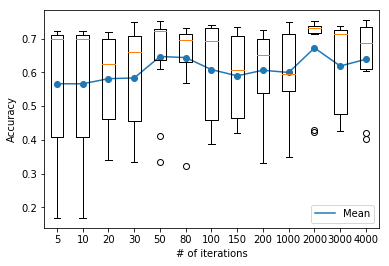

In [42]:
means = df.mean()
print(means)
x = [5,10,20,30,50,80,100,150,200,1000,2000,3000,4000]

fig = plt.figure()

pylab.plot([1,2,3,4,5,6,7,8,9,10,11,12,13], means.values, label='Mean')
pylab.scatter([1,2,3,4,5,6,7,8,9,10,11,12,13], means.values)
pylab.boxplot(df.values, labels=x, showfliers=True)
plt.xlabel('# of iterations')
plt.ylabel('Accuracy')
plt.legend()

# Plotting boxplot of accuracy

In [43]:
fig.savefig("baboons_boxplot", dpi=3000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)